In [15]:
import json
import numpy as np
from clustering.clustering_params import Data
from clustering.clustering_params import DifferentialPrivacyParam
from clustering.clustering_algorithm import private_lsh_clustering

# load /data/results/peopleflow/10000/bin38/next_location_count.json
with open('/data/results/peopleflow/10000/bin38/next_location_count.json') as f:
    raw_data = json.load(f)

In [16]:
# convert data into numpy array
data = np.array([v for v in raw_data.values()])

# compute the max l2 norm
radius = np.max(np.linalg.norm(data, axis=1))

# labels are None
labels = None

data = Data(data, radius, labels)

In [33]:
eps = 100
privacy_param = DifferentialPrivacyParam(epsilon=eps, delta=1e-6)
k = 10
n_locations = 1600

result = private_lsh_clustering(k, data, privacy_param)

In [26]:
from my_utils import plot_density, noise_normalize
import pathlib

for i, class_i in enumerate(result.centers):
    distribution = noise_normalize(class_i)
    save_path = pathlib.Path(f"./temp/class_{i}.png")

    plot_density(distribution, 1600, save_path)


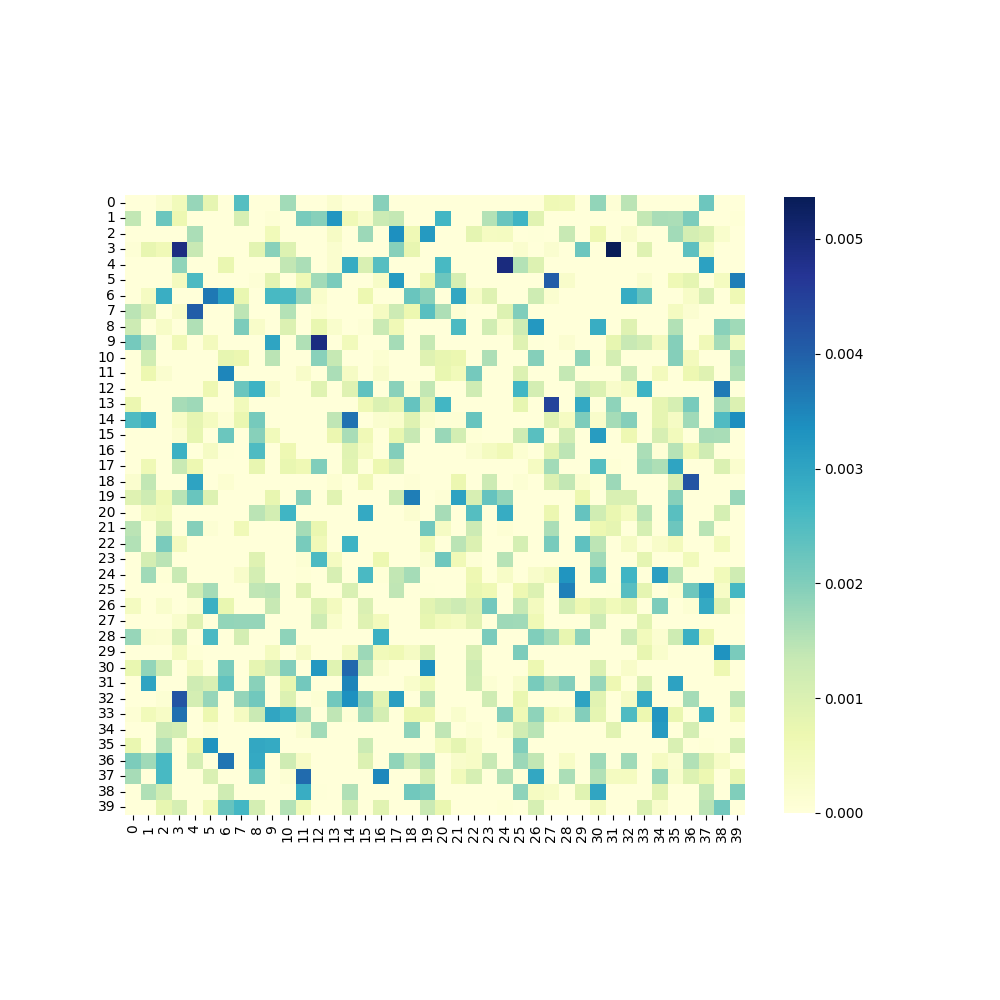

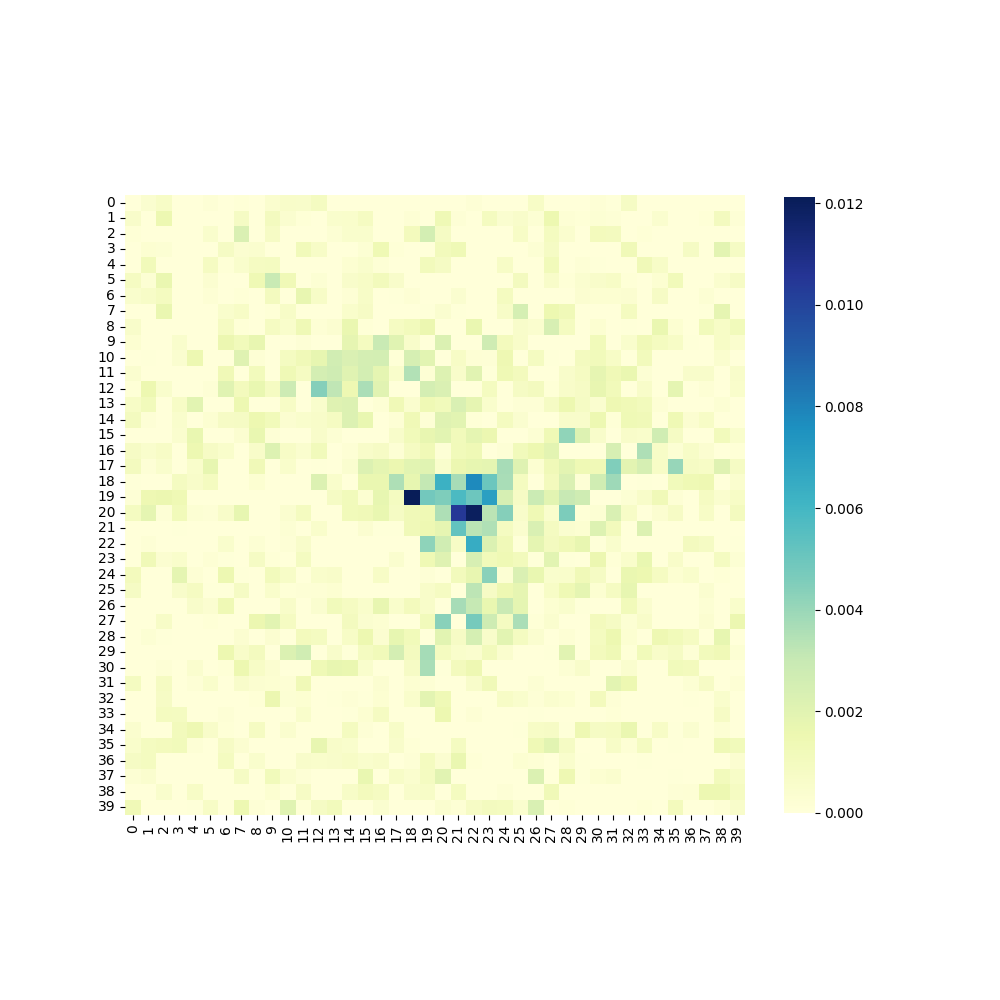

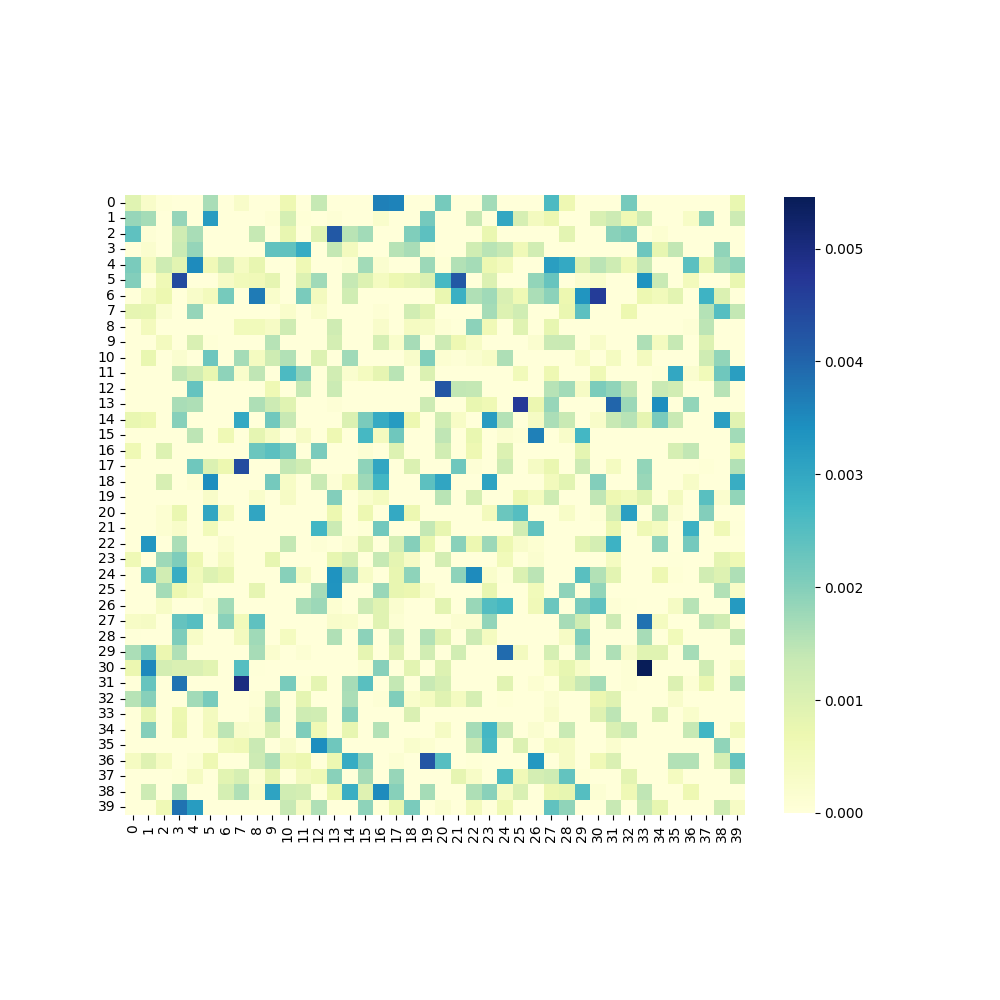

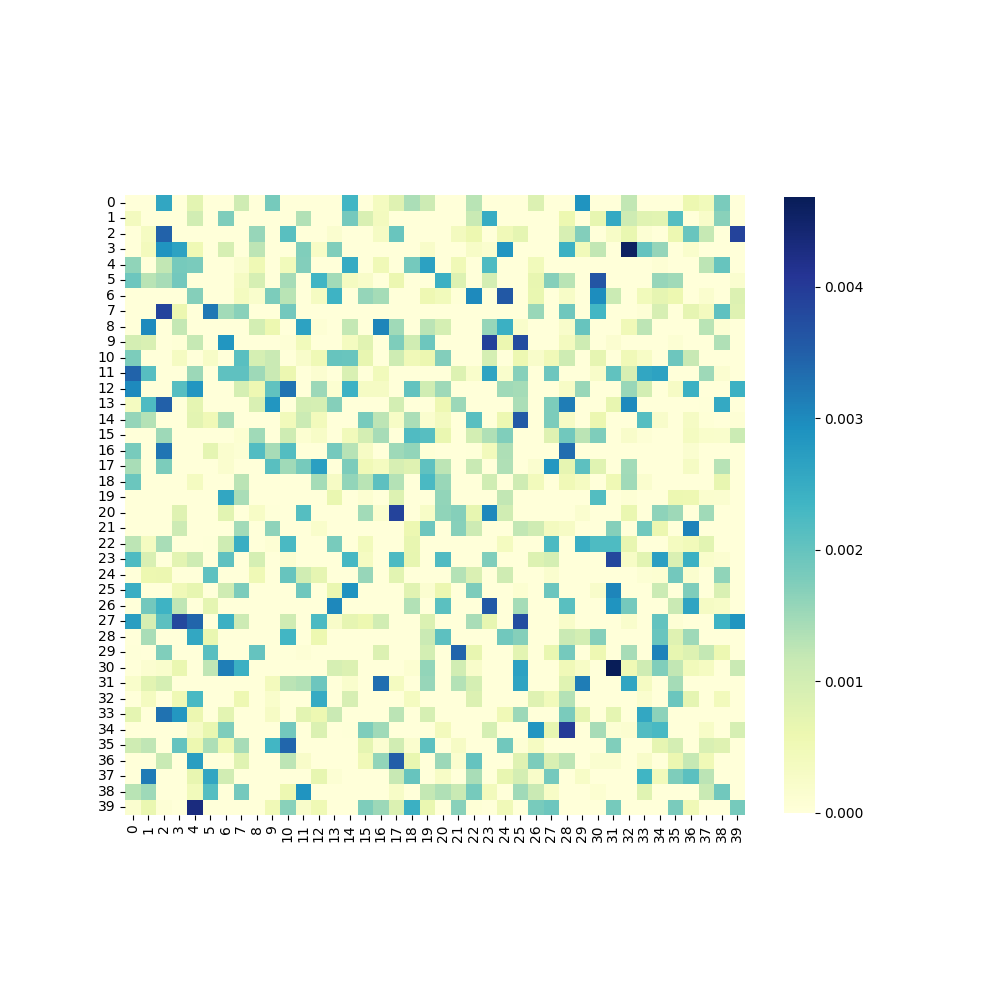

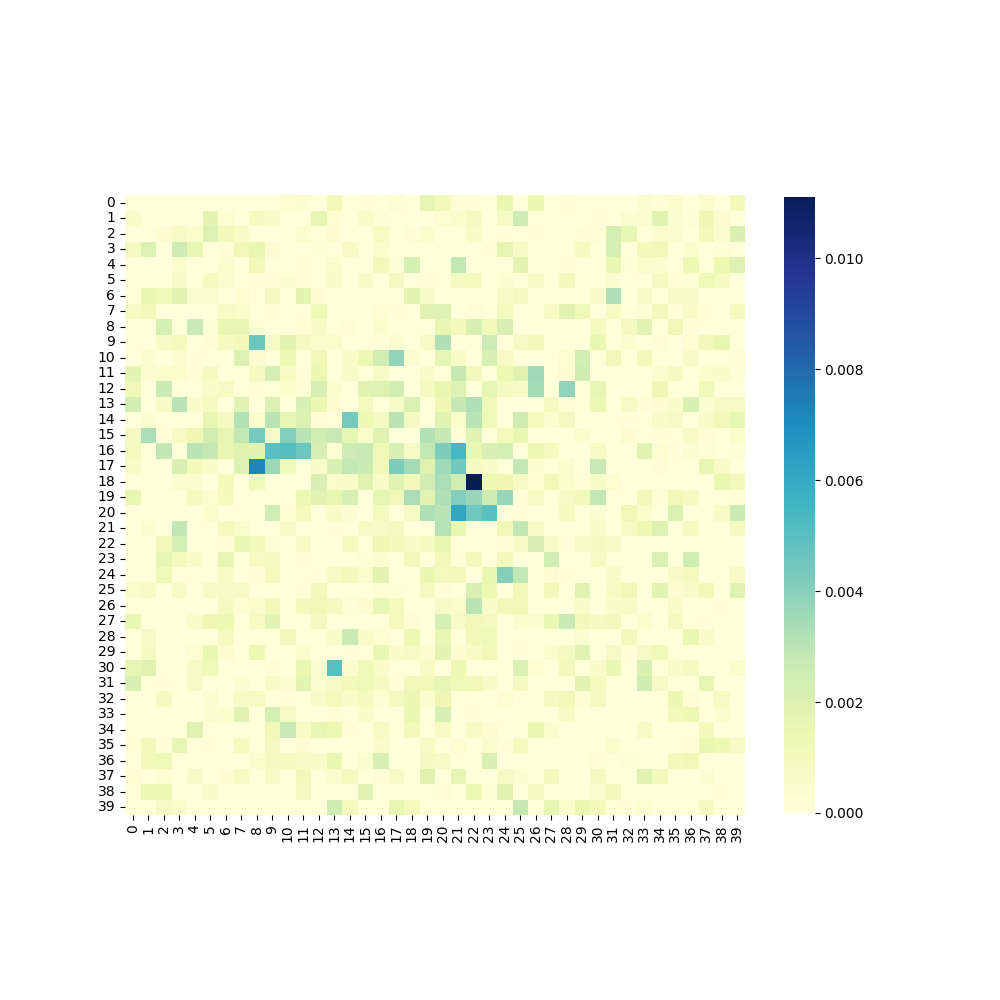

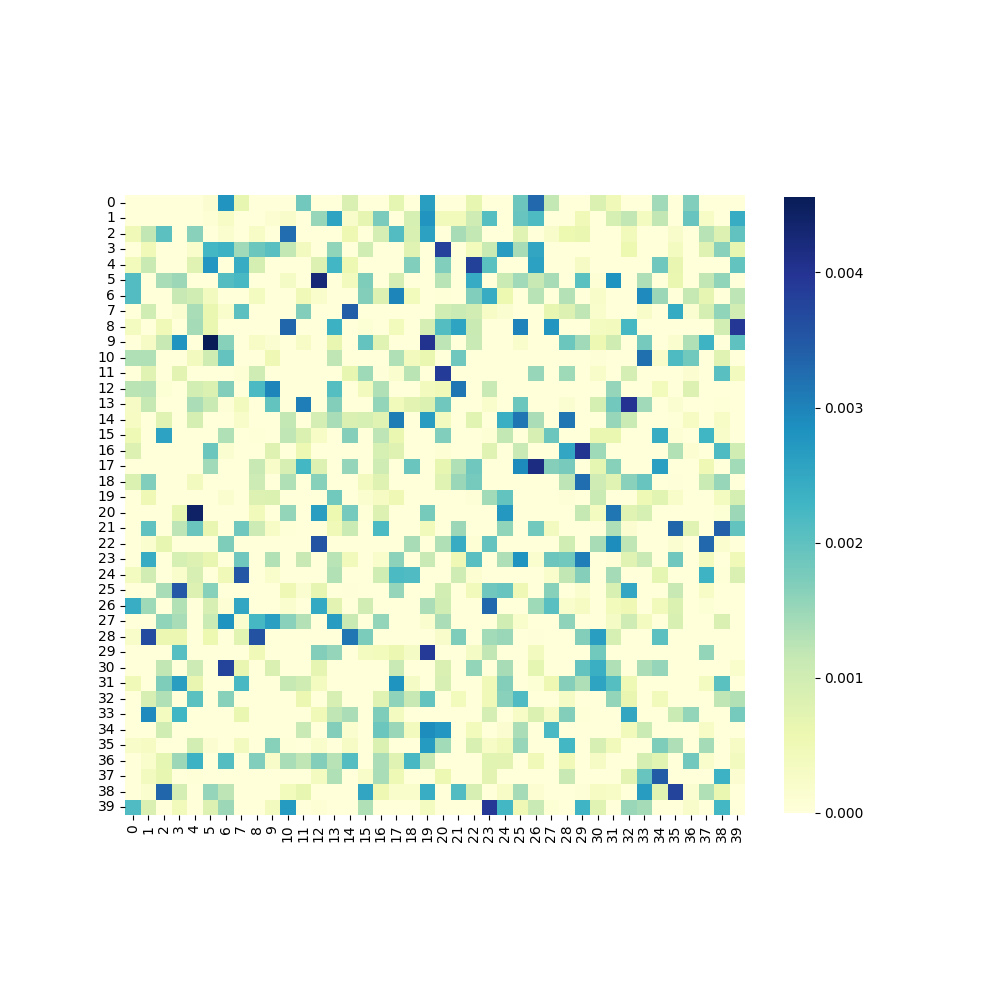

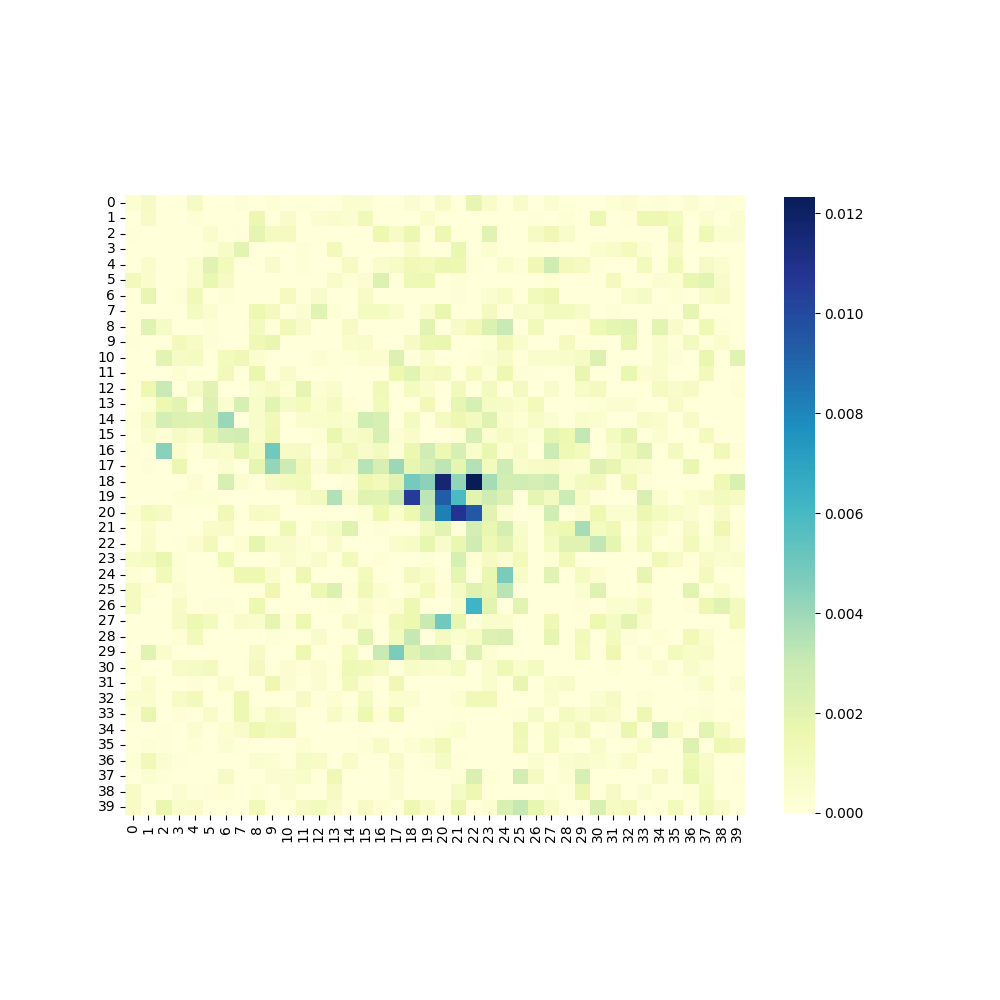

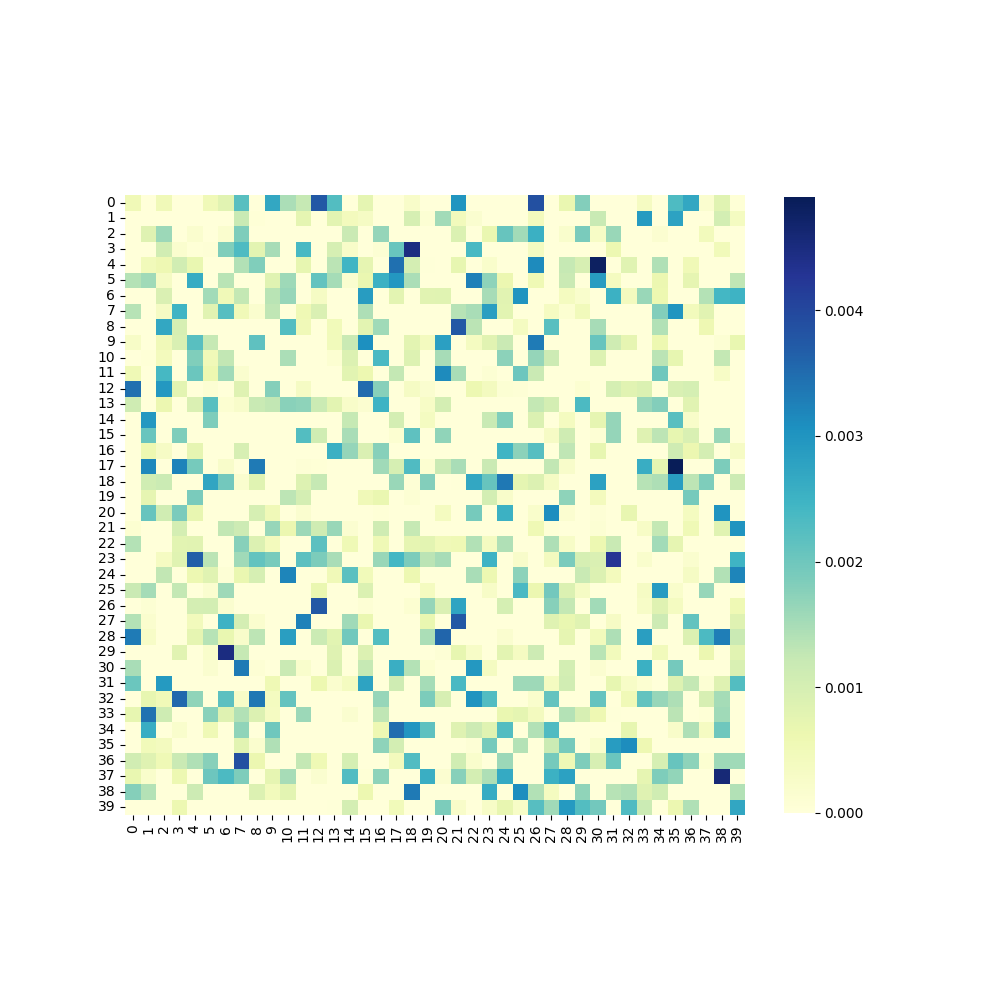

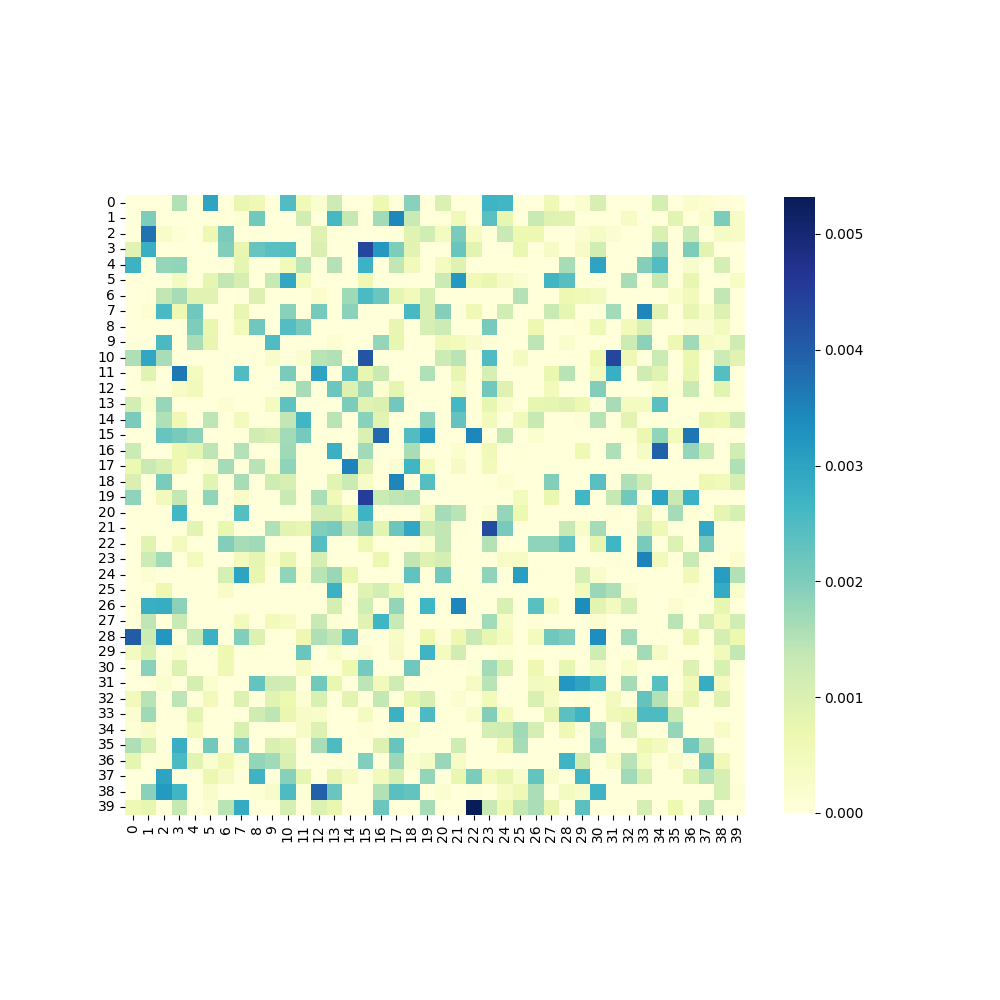

In [34]:
# show the png files
from IPython.display import Image, display
from glob import glob

for filename in glob('./temp/*.png'):
    display(Image(filename))